In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv("TMDB_movie_dataset_v11.csv")


data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372750 entries, 0 to 1372749
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1372750 non-null  int64  
 1   title                 1372732 non-null  object 
 2   vote_average          1372750 non-null  float64
 3   vote_count            1372750 non-null  int64  
 4   status                1372750 non-null  object 
 5   release_date          1080311 non-null  object 
 6   revenue               1372750 non-null  int64  
 7   runtime               1372750 non-null  int64  
 8   adult                 1372750 non-null  bool   
 9   backdrop_path         344648 non-null   object 
 10  budget                1372750 non-null  int64  
 11  homepage              141728 non-null   object 
 12  imdb_id               657554 non-null   object 
 13  original_language     1372750 non-null  object 
 14  original_title        1372732 non-

In [20]:
#filter out randomly to  100000 rows

data = data.sample(10000)


data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 14760 to 779961
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   vote_average          10000 non-null  float64
 3   vote_count            10000 non-null  int64  
 4   status                10000 non-null  object 
 5   release_date          7936 non-null   object 
 6   revenue               10000 non-null  int64  
 7   runtime               10000 non-null  int64  
 8   adult                 10000 non-null  bool   
 9   backdrop_path         2574 non-null   object 
 10  budget                10000 non-null  int64  
 11  homepage              1032 non-null   object 
 12  imdb_id               4800 non-null   object 
 13  original_language     10000 non-null  object 
 14  original_title        10000 non-null  object 
 15  overview           

In [ ]:
#save the data to this folder
data.to_csv("TMDB_movie_dataset_v11_10000.csv", index=False)







In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object', 'bool']).columns

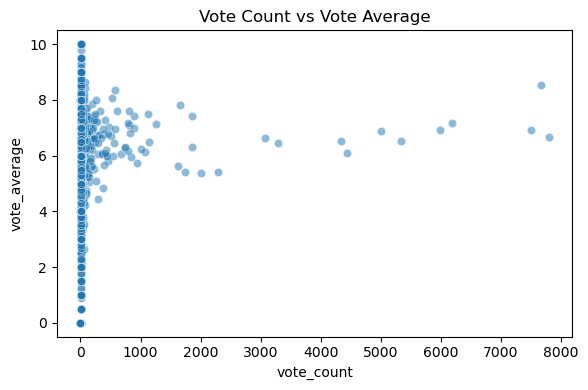

In [23]:
if {'vote_count', 'vote_average'}.issubset(data.columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        data=data.sample(min(50000, len(data))),
        x='vote_count',
        y='vote_average',
        alpha=0.5
    )
    plt.title("Vote Count vs Vote Average")
    plt.tight_layout()
    plt.show()


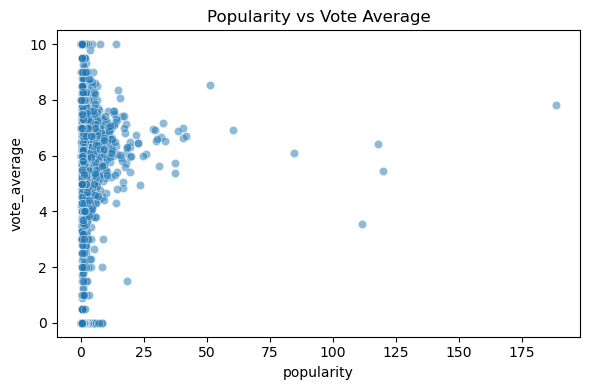

In [24]:

if {'popularity', 'vote_average'}.issubset(data.columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        data=data.sample(min(50000, len(data))),
        x='popularity',
        y='vote_average',
        alpha=0.5
    )
    plt.title("Popularity vs Vote Average")
    plt.tight_layout()
    plt.show()